<a href="https://colab.research.google.com/github/Farivini/Analise-exploratoria-Enron/blob/main/Analise_exploratoria_Enron_Vinicius_farineli_freire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

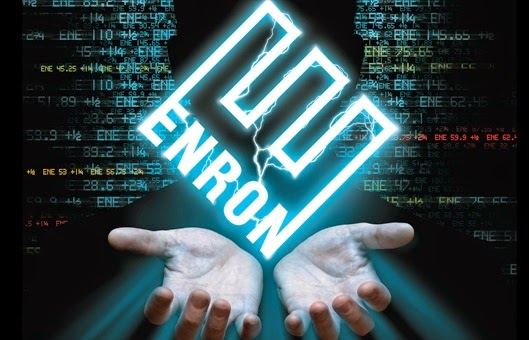



Vinicius Farineli Freire - viniciusfarineli@gmail.com

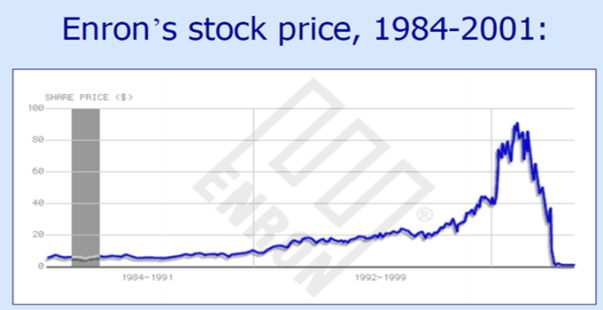
# Introdução

Nesta atividade, vamos trabalhar com um conjunto de dados da empresa Enron. A Enron foi uma das maiores empresas de energia dos Estados Unidos. No seu auge, chegou a valer 65 bilhões de dólares e ela faliu em 24 dias.  A Enron foi fundada em 1985 por Kenneth Lay com a fusão da Houston Natural Gas e da InterNorth. Anos depois, quando Jeffrey Skilling tomou posse, ele estabeleceu um conjunto de diretores que criaram entidades fictícias, relatórios financeiros fracos e contabilidades erradas, que somadas, esconderam bilhões de dólares e projetos fracassados dos investidores. O esquema foi tão complexo que nem mesmo auditorias profissionais foram capazes de identificar estes problemas, e a empresa foi investigada pelo governo norte-americano, incluindo a sua suprema corte. 
A base de dados utilizada na investigação incluía  aproximadamente 500 mil e-mails trocados por empregados da Enron.  Estes e-mails foram obtidos pela comissão regulatória de energia dos Estados Unidos durante sua investigação. A base de dados que vamos utilizar sumariza informações não apenas destes e-mails, mas também de salário e ações da bolsa de valores dos envolvidos. Além disso, os funcionários são divididos em pessoas de interesse (Person of Interest, ou POI), que participaram da fraude; e funcionários que não participaram da fraude, ou não-POIs.

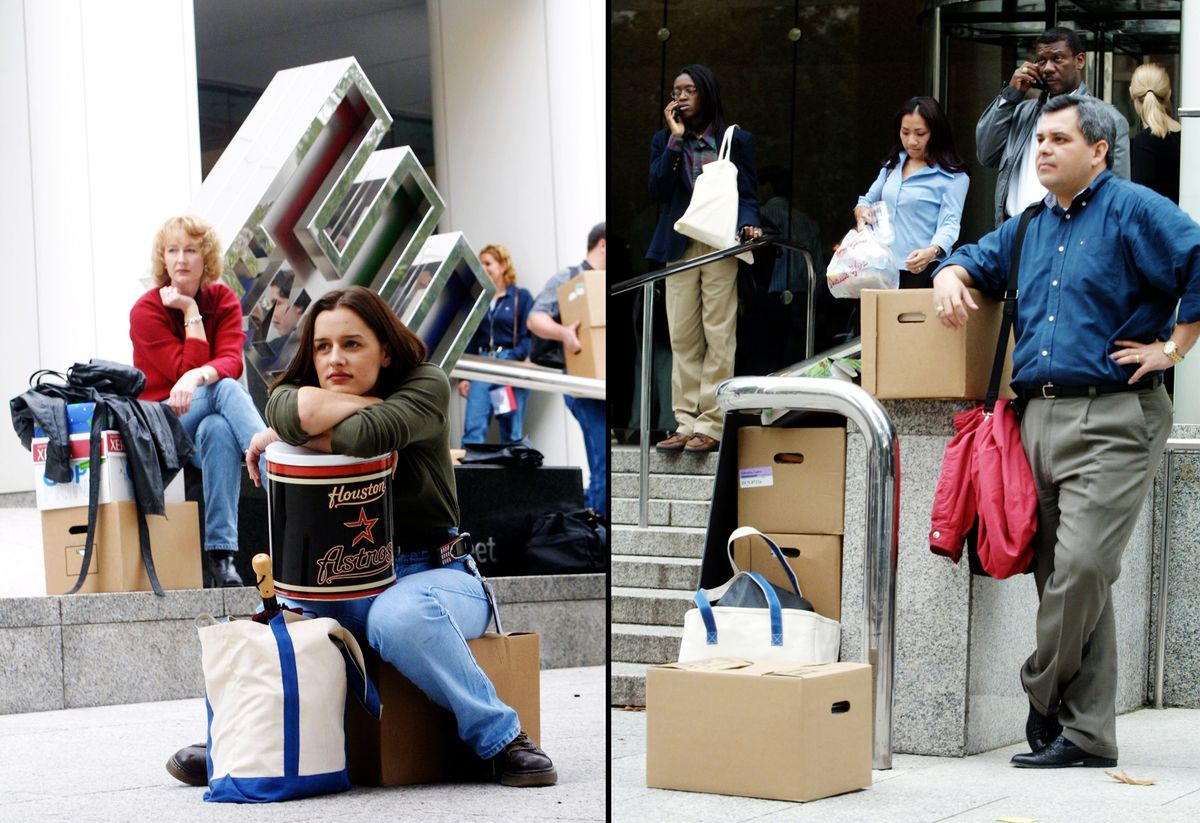





In [1]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# Carregamento de dados



In [4]:
data = pd.read_csv('enron.csv')

Verificando se os dados carregaram corretamente:

In [5]:
dfp = pd.DataFrame(data)



print('Dimensões do Dataset',
      '\nVariáveis: ',dfp.shape[1], "\n"
      'Entrada: ',dfp.shape[0])

Dimensões do Dataset 
Variáveis:  22 
Entrada:  146


In [6]:
dfp.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
0,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,NaN,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,ALLEN PHILLIP K
1,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0,BADUM JAMES P
2,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,NaN,NaN,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,BANNANTINE JAMES M
3,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,NaN,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0,BAXTER JOHN C
4,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,NaN,NaN,69.0,False,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0,BAY FRANKLIN R


In [7]:
dfp.tail(16)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
130,97343619.0,32083396.0,-27992891.0,1398517.0,NaN,311764000.0,5235198.0,NaN,NaN,NaN,83925000.0,48521928.0,42667589.0,False,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0,TOTAL
131,788750.0,NaN,NaN,NaN,adam.umanoff@enron.com,NaN,53122.0,18.0,12.0,0.0,NaN,NaN,NaN,False,NaN,NaN,288589.0,41.0,111.0,1130461.0,NaN,UMANOFF ADAM S
132,NaN,NaN,-36666.0,36666.0,NaN,NaN,228656.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,228656.0,NaN,URQUHART JOHN A
133,NaN,NaN,NaN,109298.0,NaN,NaN,103773.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,213071.0,NaN,WAKEHAM JOHN
134,850000.0,NaN,NaN,NaN,rob.walls@enron.com,4346544.0,50936.0,146.0,17.0,0.0,NaN,540751.0,2.0,False,1552453.0,NaN,357091.0,215.0,671.0,1798780.0,5898997.0,WALLS JR ROBERT H
135,NaN,53625.0,NaN,NaN,NaN,1030329.0,33785.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,87410.0,1030329.0,WALTERS GARETH W
136,325000.0,831299.0,-583325.0,NaN,george.wasaff@enron.com,1668260.0,NaN,30.0,22.0,7.0,NaN,200000.0,1425.0,False,388167.0,NaN,259996.0,337.0,400.0,1034395.0,2056427.0,WASAFF GEORGE
137,NaN,NaN,-10800.0,NaN,dick.westfahl@enron.com,NaN,51870.0,NaN,NaN,NaN,NaN,256191.0,401130.0,False,384930.0,NaN,63744.0,NaN,NaN,762135.0,384930.0,WESTFAHL RICHARD K
138,NaN,NaN,NaN,NaN,NaN,98718.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,98718.0,WHALEY DAVID A
139,3000000.0,NaN,NaN,NaN,greg.whalley@enron.com,3282960.0,57838.0,556.0,186.0,24.0,NaN,808346.0,301026.0,False,2796177.0,NaN,510364.0,3920.0,6019.0,4677574.0,6079137.0,WHALLEY LAWRENCE G


### Conseguimos ver quantas variaveis e entradas tem na nossa base

In [8]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bonus                      82 non-null     float64
 1   deferral_payments          39 non-null     float64
 2   deferred_income            49 non-null     float64
 3   director_fees              17 non-null     float64
 4   email_address              111 non-null    object 
 5   exercised_stock_options    102 non-null    float64
 6   expenses                   95 non-null     float64
 7   from_messages              86 non-null     float64
 8   from_poi_to_this_person    86 non-null     float64
 9   from_this_person_to_poi    86 non-null     float64
 10  loan_advances              4 non-null      float64
 11  long_term_incentive        66 non-null     float64
 12  other                      93 non-null     float64
 13  poi                        146 non-null    bool   

# Podemos ver as correlações entre as variaveis

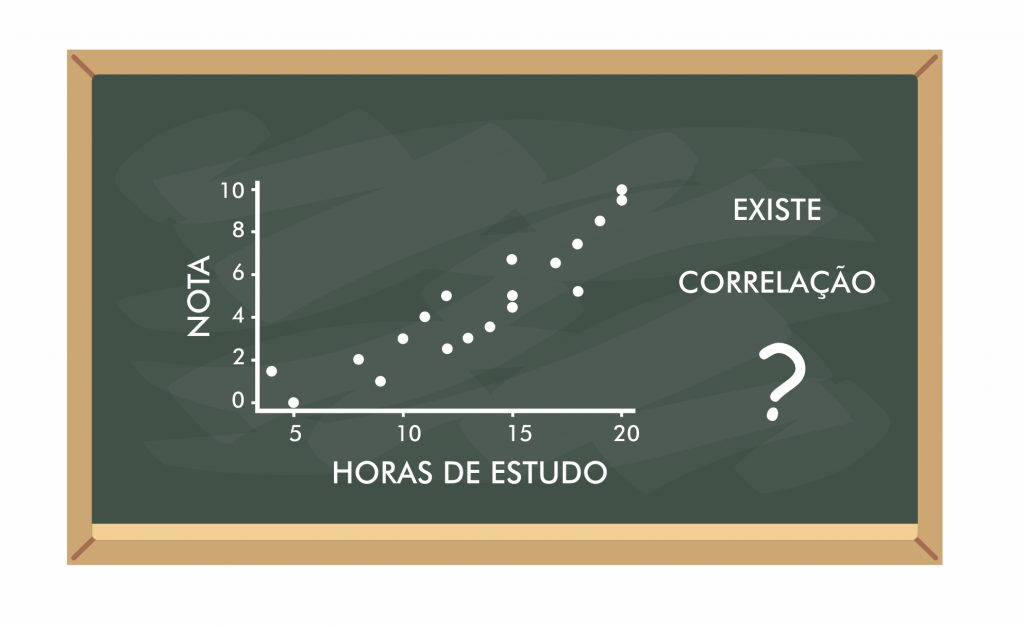

In [9]:
dfp.drop(index=130,inplace=True)

In [10]:
dfp.corr()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
bonus,1.000000,0.293543,-0.411659,NaN,0.506998,0.033799,0.052725,0.562187,0.354634,0.973826,0.625259,0.376371,0.302384,0.376992,0.118222,0.523190,0.549102,0.372997,0.569054,0.509441
deferral_payments,0.293543,1.000000,-0.881500,NaN,0.019009,0.004800,0.321947,0.424101,0.206993,-1.000000,0.042448,0.385829,-0.098428,0.115088,-0.412777,0.455884,0.356696,0.310129,0.066774,0.075710
deferred_income,-0.411659,-0.881500,1.000000,-0.464837,-0.308076,0.101181,-0.319995,-0.178951,-0.271673,1.000000,-0.331715,-0.185219,-0.265698,-0.133895,0.173154,-0.353816,-0.394677,-0.350815,-0.054404,-0.298189
director_fees,NaN,NaN,-0.464837,1.000000,0.623257,-0.504631,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,-0.968483,0.575257,NaN,1.000000,-1.000000,0.317360,0.997476
exercised_stock_options,0.506998,0.019009,-0.308076,0.623257,1.000000,0.019412,-0.066129,0.160253,-0.030101,0.960259,0.500016,0.536248,0.503551,0.690935,-0.051644,0.607324,0.154333,0.079568,0.591690,0.963560
expenses,0.033799,0.004800,0.101181,-0.504631,0.019412,1.000000,0.094144,-0.059244,0.014964,0.658681,-0.100766,0.062874,0.060292,0.042896,0.040947,0.145364,0.223495,0.155070,0.109798,0.034707
from_messages,0.052725,0.321947,-0.319995,1.000000,-0.066129,0.094144,1.000000,0.186708,0.588687,-0.213768,-0.071958,-0.101686,-0.074308,0.003145,-0.326671,-0.003541,0.230855,0.475450,-0.033089,-0.036310
from_poi_to_this_person,0.562187,0.424101,-0.178951,NaN,0.160253,-0.059244,0.186708,1.000000,0.445063,0.009878,0.212538,0.111249,0.167722,0.133594,-0.455876,0.179055,0.659264,0.525667,0.154431,0.146366
from_this_person_to_poi,0.354634,0.206993,-0.271673,1.000000,-0.030101,0.014964,0.588687,0.445063,1.000000,0.934835,0.083591,-0.110335,0.112940,0.049284,-0.398550,0.021288,0.475748,0.568506,0.011556,0.001289
loan_advances,0.973826,-1.000000,1.000000,NaN,0.960259,0.658681,-0.213768,0.009878,0.934835,1.000000,1.000000,1.000000,0.999851,1.000000,NaN,0.535252,0.291501,0.739805,0.991879,0.962026


In [11]:
fig  =  px . scatter_matrix ( dfp , dimensions = [ "expenses" , "total_payments" , "bonus" , "salary" ], color = "name" )
fig . show ()

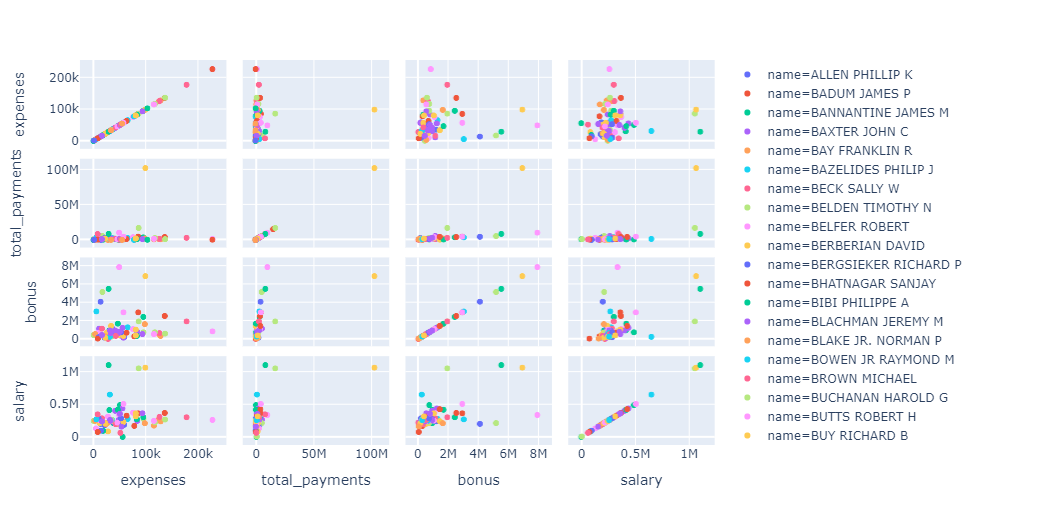

## Vamos pegar a correlação entre as variaveis de recebimento e gastos e bonus

In [12]:
dfp[['salary','expenses','bonus','total_payments']].corr()

,salary,expenses,bonus,total_payments
salary,1.000000,0.145364,0.523190,0.579260
expenses,0.145364,1.000000,0.033799,0.109798
bonus,0.523190,0.033799,1.000000,0.569054
total_payments,0.579260,0.109798,0.569054,1.000000


Nota-se que a correlação entre elas é forte. Vamos usa-las,
Verificando dados duplicados com nomes , 
Verificando emails para ver se os dados batem.

Vamos usar as colunas com os nomes em ingles mesmo.

In [13]:
nomes = data['name'].nunique()
print(f'O total de pessoas é {nomes}')
email = data['email_address'].nunique()
print(f'O total de email é {email} ')
print('--------------------')
print('Variaveis Quantitativas ')
print('--------------------')

df = pd.DataFrame(data)
salario = df[['name','salary','expenses','total_payments']]
salario


O total de pessoas é 146
O total de email é 111 
--------------------
Variaveis Quantitativas 
--------------------


,name,salary,expenses,total_payments
0,ALLEN PHILLIP K,201955.0,13868.0,4484442.0
1,BADUM JAMES P,NaN,3486.0,182466.0
2,BANNANTINE JAMES M,477.0,56301.0,916197.0
3,BAXTER JOHN C,267102.0,11200.0,5634343.0
4,BAY FRANKLIN R,239671.0,129142.0,827696.0
...,...,...,...,...
141,WINOKUR JR. HERBERT S,NaN,1413.0,84992.0
142,WODRASKA JOHN,NaN,NaN,189583.0
143,WROBEL BRUCE,NaN,NaN,NaN
144,YEAGER F SCOTT,158403.0,53947.0,360300.0


### Se verificar na linha 130 temos como name = Total.
Isto prejudica as proximas analises, então vamos tirar excluir esta linha.

In [14]:
df.drop(index=130,inplace=True)

Verificando se retirou

In [15]:
salario = df[['name','salary','expenses','total_payments']]
salario.tail(25)

,name,salary,expenses,total_payments
120,SHERRICK JEFFREY B,NaN,NaN,NaN
121,SHERRIFF JOHN R,428780.0,NaN,4335388.0
122,SKILLING JEFFREY K,1111258.0,29336.0,8682716.0
123,STABLER FRANK,239502.0,16514.0,1112087.0
124,SULLIVAN-SHAKLOVITZ COLLEEN,162779.0,NaN,999356.0
125,SUNDE MARTIN,257486.0,NaN,1545059.0
126,TAYLOR MITCHELL S,265214.0,NaN,1092663.0
127,THE TRAVEL AGENCY IN THE PARK,NaN,NaN,362096.0
128,THORN TERENCE H,222093.0,46145.0,911453.0
129,TILNEY ELIZABETH A,247338.0,NaN,399393.0


# Novamente o nome de LAY KENNETH L aparece com alto recebimento.

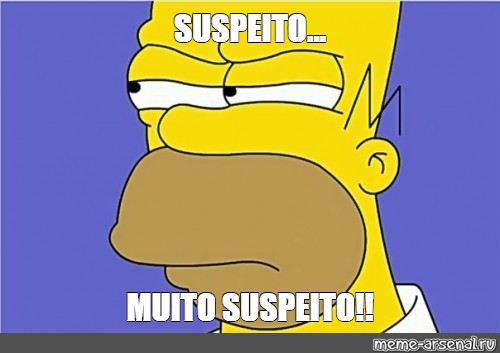



In [16]:
fig = px.scatter(salario, x="salary", y="total_payments",color="name")
fig.show()

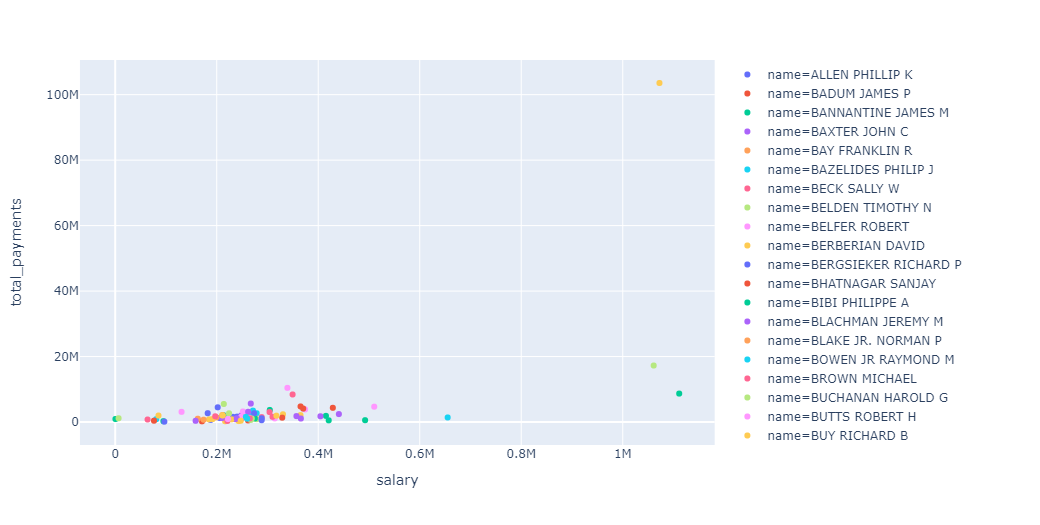

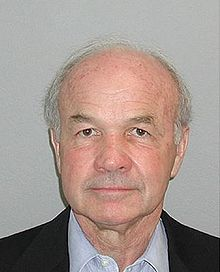

#  Analise em cima da variavel salario 

1.   Media
2.   Mediana
3.   Variancia
4.   Desvio padrão
5.   Quantis

In [17]:
media = salario['salary'].mean()
mediana = salario['salary'].median()
varianca = salario['salary'].var()
desviop = salario['salary'].std()
quantis1 = salario['salary'].quantile(0.25)
quantis2 = salario['salary'].quantile(0.5)
quantis3 = salario['salary'].quantile(0.75)

print(f'A media é : {media} \n'
      f'A mediana é : {mediana} \n'
      f'A variancia é : {varianca} \n'
      f'O desviop padrão é : {desviop} \n'
      f'Primeiro quartil é : {quantis1} \n'
      f'Segundo quartil é : {quantis2} \n'
      f'Terceiro quartil é : {quantis3} \n')

A media é : 284087.5425531915 
A mediana é : 258741.0 
A variancia é : 31375432034.874508 
O desviop padrão é : 177131.11537749236 
Primeiro quartil é : 211802.0 
Segundo quartil é : 258741.0 
Terceiro quartil é : 308606.5 



# Agrupamos agora os dados por pessoa, e verificamos se POI e false ou true

In [22]:
data.drop(index=130,inplace=True)

### Verifica as POI igual a False

In [25]:
contaf = 0
for i in range(0, len(data)):
  try:
    mostra = data.loc[i]
    
    if(mostra['poi'] == False):
      print('************************************** \n')
      print(mostra)
      contaf = contaf + 1
  except:
    pass

************************************** 

bonus                                      4.175e+06
deferral_payments                        2.86972e+06
deferred_income                         -3.08106e+06
director_fees                                    NaN
email_address                phillip.allen@enron.com
exercised_stock_options                  1.72954e+06
expenses                                       13868
from_messages                                   2195
from_poi_to_this_person                           47
from_this_person_to_poi                           65
loan_advances                                    NaN
long_term_incentive                           304805
other                                            152
poi                                            False
restricted_stock                              126027
restricted_stock_deferred                    -126027
salary                                        201955
shared_receipt_with_poi                         1407
to_me

### Verificas as POI igual a True

In [26]:
conta = 0
for i in range(0, len(df)):
  try:
    mostra = df.loc[i]
  
    if(mostra['poi'] == True):
     print('************************************** \n')
     print(mostra)
     conta = conta + 1
  except:
    pass

************************************** 

bonus                                    5.25e+06
deferral_payments                     2.14401e+06
deferred_income                      -2.33443e+06
director_fees                                 NaN
email_address                tim.belden@enron.com
exercised_stock_options                    953136
expenses                                    17355
from_messages                                 484
from_poi_to_this_person                       228
from_this_person_to_poi                       108
loan_advances                                 NaN
long_term_incentive                           NaN
other                                      210698
poi                                          True
restricted_stock                           157569
restricted_stock_deferred                     NaN
salary                                     213999
shared_receipt_with_poi                      5521
to_messages                                  7991
total_pay

## Verificando quantos tem de cada um.

In [27]:
print(f'Quantidade de POI para false é: {contaf}')
print(f'Quantidade de POI para true é: {conta}')

Quantidade de POI para false é: 126
Quantidade de POI para true é: 18


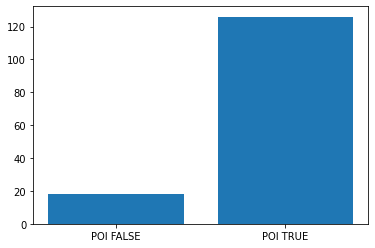

In [28]:
grupo = ['POI FALSE','POI TRUE']
valores = [conta, contaf]
plt.bar(grupo,valores)
plt.show()

# Analisando pagamentos , salario e bonus

In [29]:
salario = df[['name','salary','expenses','total_payments','poi','bonus']]

### Podemos verificar também a correlação entre gastos x salarios

[]

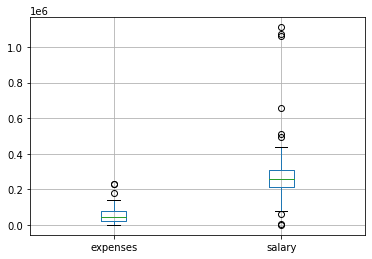

In [30]:
boxplot = salario.boxplot(column=['expenses','salary'])
boxplot.plot()

In [31]:
tp = px.box(salario, y="total_payments")
tp.show()

In [32]:
fig = px.box(salario, y="bonus")
fig.show()

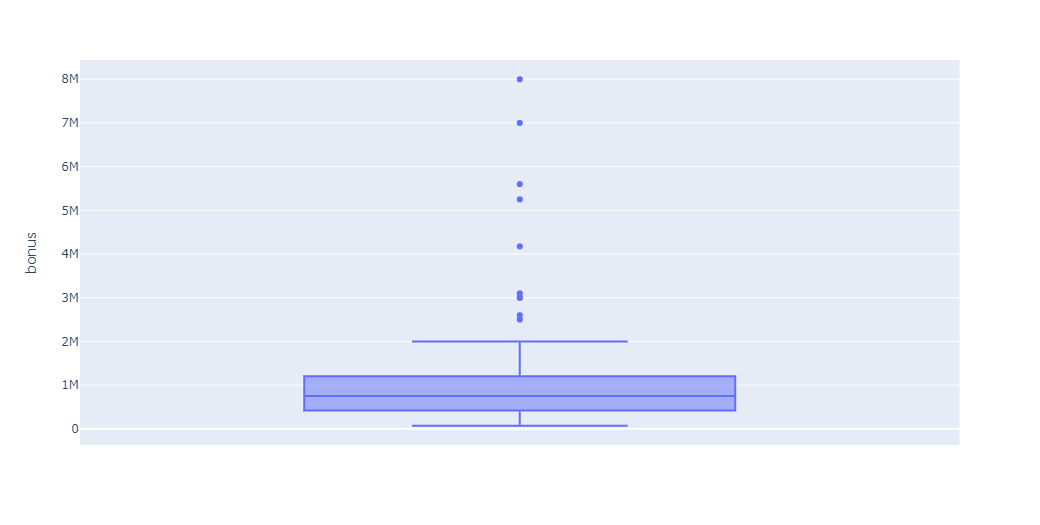

### Um simples graficos conseguimos ver os nomes que tem alguma anomalia

In [33]:
fig = px.scatter(salario, x="name", y="total_payments")
fig.show()

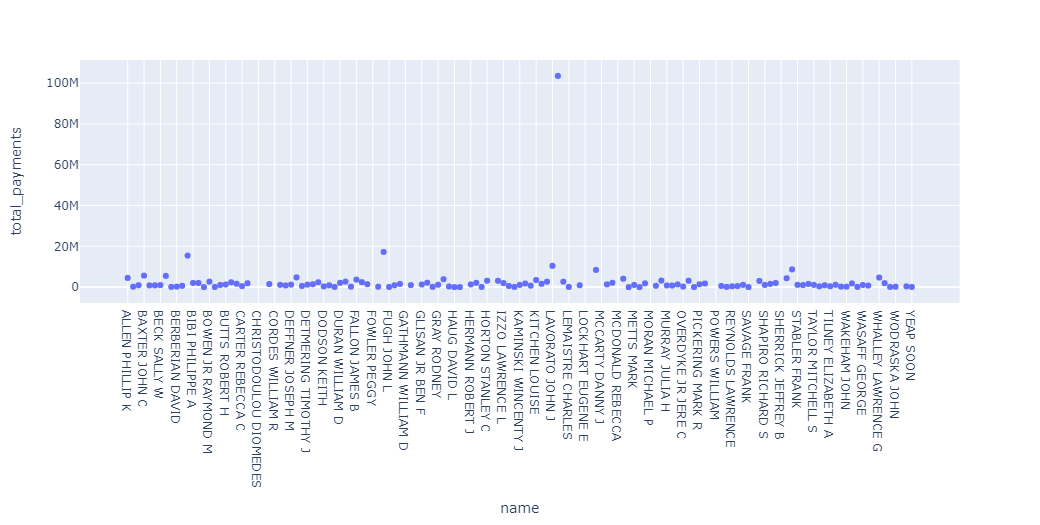

# Acima relacionamos as pessoas com o salario , e ja notamos que a valores nulos, abaixo vamos ver quantos valores temos como nulo ou faltantes.

## Mister Null entra em ação.

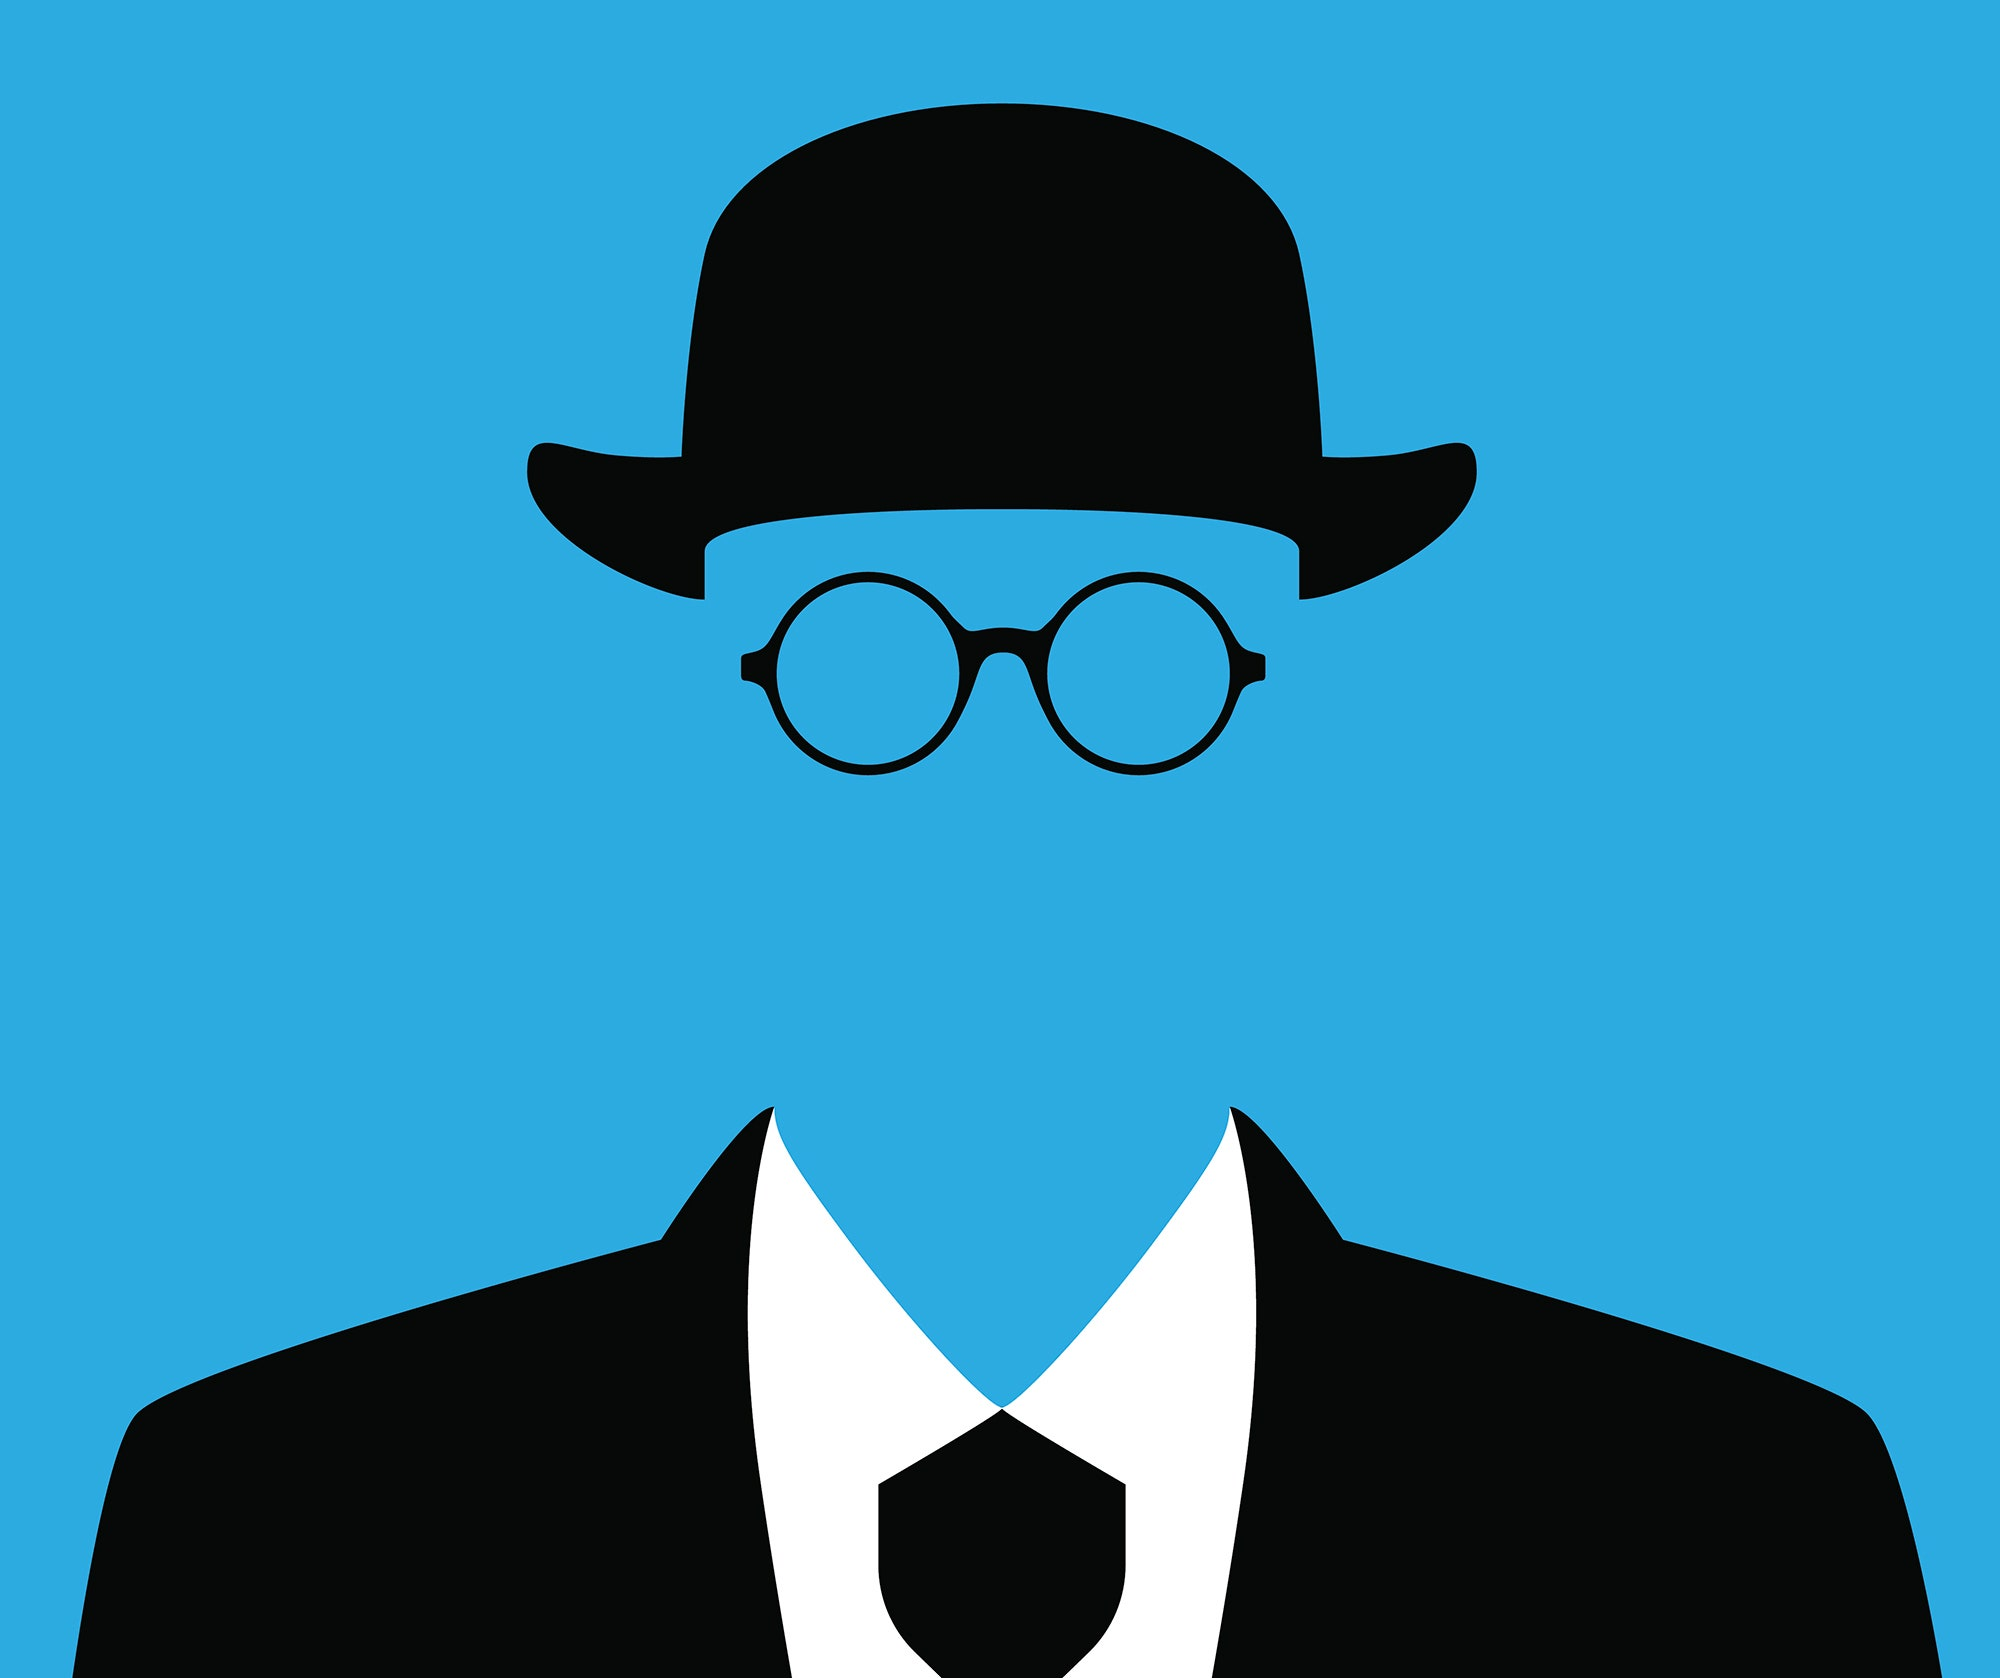

In [34]:
df.isnull().sum().sort_values(ascending=False)

loan_advances                142
director_fees                129
restricted_stock_deferred    128
deferral_payments            107
deferred_income               97
long_term_incentive           80
bonus                         64
from_this_person_to_poi       59
from_poi_to_this_person       59
from_messages                 59
shared_receipt_with_poi       59
to_messages                   59
other                         53
salary                        51
expenses                      51
exercised_stock_options       44
restricted_stock              36
email_address                 34
total_payments                21
total_stock_value             20
poi                            0
name                           0
dtype: int64

Conseguimos ver que valores faltantes acima de 70 poderiamos descartar, que são eles:

adiantamentos de empréstimo               142

taxas de diretor                129


estoque restrito diferido    128

pagamentos adiados            107


renda diferida               97

incentivo de longo prazo           80

# Podemos fazer uma analises em cada uma delas

## Vamos ver se alguma delas tem correlação.

In [35]:
df[['loan_advances','director_fees','restricted_stock_deferred','deferral_payments','deferred_income','long_term_incentive']].corr()

,loan_advances,director_fees,restricted_stock_deferred,deferral_payments,deferred_income,long_term_incentive
loan_advances,1.0,NaN,NaN,-1.000000,1.000000,1.000000
director_fees,NaN,1.000000,0.575257,NaN,-0.464837,NaN
restricted_stock_deferred,NaN,0.575257,1.000000,-0.412777,0.173154,-0.186597
deferral_payments,-1.0,NaN,-0.412777,1.000000,-0.881500,0.042448
deferred_income,1.0,-0.464837,0.173154,-0.881500,1.000000,-0.331715
long_term_incentive,1.0,NaN,-0.186597,0.042448,-0.331715,1.000000


### Mas antes vamos mudar os NaN para zero para facilitar as consultas

In [36]:
df.fillna(0,inplace=True)

Verificando...

In [37]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
0,4175000.0,2869717.0,-3081055.0,0.0,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,0.0,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,ALLEN PHILLIP K
1,0.0,178980.0,0.0,0.0,0,257817.0,3486.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0,BADUM JAMES P
2,0.0,0.0,-5104.0,0.0,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,0.0,0.0,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,BANNANTINE JAMES M
3,1200000.0,1295738.0,-1386055.0,0.0,0,6680544.0,11200.0,0.0,0.0,0.0,0.0,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0,BAXTER JOHN C
4,400000.0,260455.0,-201641.0,0.0,frank.bay@enron.com,0.0,129142.0,0.0,0.0,0.0,0.0,0.0,69.0,False,145796.0,-82782.0,239671.0,0.0,0.0,827696.0,63014.0,BAY FRANKLIN R


### Verificando o salarios iguais a Zero e POI igual a True que são as pessoas envolvidas com fraude.

In [38]:
salario_zero = df.query('salary == 0')
salario_zero

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
1,0.0,178980.0,0.0,0.0,0,257817.0,3486.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0,BADUM JAMES P
8,0.0,-102500.0,0.0,3285.0,0,3285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,44093.0,0.0,0.0,0.0,102500.0,-44093.0,BELFER ROBERT
11,0.0,0.0,0.0,137864.0,sanjay.bhatnagar@enron.com,2604490.0,0.0,29.0,0.0,1.0,0.0,0.0,137864.0,False,-2604490.0,15456290.0,0.0,463.0,523.0,15456290.0,0.0,BHATNAGAR SANJAY
14,0.0,0.0,-113784.0,113784.0,0,0.0,1279.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,1279.0,0.0,BLAKE JR. NORMAN P
16,0.0,0.0,0.0,0.0,michael.brown@enron.com,0.0,49288.0,41.0,13.0,1.0,0.0,0.0,0.0,False,0.0,0.0,0.0,761.0,1486.0,49288.0,0.0,BROWN MICHAEL
23,0.0,0.0,-98784.0,98784.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,32460.0,-32460.0,0.0,0.0,0.0,0.0,0.0,CHAN RONNIE
24,0.0,0.0,0.0,0.0,diomedes.christodoulou@enron.com,5127155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,950730.0,0.0,0.0,0.0,0.0,0.0,6077885.0,CHRISTODOULOU DIOMEDES
25,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,662086.0,-472568.0,0.0,0.0,0.0,0.0,189518.0,CLINE KENNETH W
27,0.0,0.0,0.0,0.0,bill.cordes@enron.com,651850.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,False,386335.0,0.0,0.0,58.0,764.0,0.0,1038185.0,CORDES WILLIAM R
38,0.0,0.0,-25000.0,102492.0,0,371750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,77492.0,371750.0,DUNCAN JOHN H


### Achamos uma pessoa POI com salario igual a zero.

In [39]:
salario_zero.query('poi == True')

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
65,0.0,10259.0,0.0,0.0,joe.hirko@enron.com,30766064.0,77978.0,0.0,0.0,0.0,0.0,0.0,2856.0,True,0.0,0.0,0.0,0.0,0.0,91093.0,30766064.0,HIRKO JOSEPH


### Vamos ver a coluna total de pagamentos.

A soma das colunas

In [40]:
df['total_payments'].sum()

325304226.0

# Vamos ver os POI's 

In [41]:
ptru = df.query('poi == True')

In [42]:
ptru

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
7,5249999.0,2144013.0,-2334434.0,0.0,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,0.0,0.0,210698.0,True,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0,BELDEN TIMOTHY N
15,1350000.0,0.0,-833.0,0.0,raymond.bowen@enron.com,0.0,65907.0,27.0,140.0,15.0,0.0,974293.0,1621.0,True,252055.0,0.0,278601.0,1593.0,1858.0,2669589.0,252055.0,BOWEN JR RAYMOND M
20,1250000.0,0.0,-262500.0,0.0,christopher.calger@enron.com,0.0,35818.0,144.0,199.0,25.0,0.0,375304.0,486.0,True,126027.0,0.0,240189.0,2188.0,2598.0,1639297.0,126027.0,CALGER CHRISTOPHER F
22,1000000.0,0.0,-235000.0,0.0,richard.causey@enron.com,0.0,30674.0,49.0,58.0,12.0,0.0,350000.0,307895.0,True,2502063.0,0.0,415189.0,1585.0,1892.0,1868758.0,2502063.0,CAUSEY RICHARD A
26,1200000.0,27610.0,-144062.0,0.0,wes.colwell@enron.com,0.0,16514.0,40.0,240.0,11.0,0.0,0.0,101740.0,True,698242.0,0.0,288542.0,1132.0,1758.0,1490344.0,698242.0,COLWELL WESLEY
31,3000000.0,0.0,0.0,0.0,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,609.0,0.0,1294981.0,1661.0,True,1323148.0,0.0,365163.0,2097.0,3093.0,4747979.0,3614261.0,DELAINEY DAVID W
43,1300000.0,0.0,-1386055.0,0.0,andrew.fastow@enron.com,0.0,55921.0,0.0,0.0,0.0,0.0,1736055.0,277464.0,True,1794412.0,0.0,440698.0,0.0,0.0,2424083.0,1794412.0,FASTOW ANDREW S
54,600000.0,0.0,0.0,0.0,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,6.0,0.0,71023.0,200308.0,True,393818.0,0.0,274975.0,874.0,873.0,1272284.0,778546.0,GLISAN JR BEN F
59,1500000.0,0.0,-3117011.0,0.0,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,21.0,0.0,1617011.0,11350.0,True,853064.0,0.0,243293.0,1035.0,1045.0,288682.0,6391065.0,HANNON KEVIN P
65,0.0,10259.0,0.0,0.0,joe.hirko@enron.com,30766064.0,77978.0,0.0,0.0,0.0,0.0,0.0,2856.0,True,0.0,0.0,0.0,0.0,0.0,91093.0,30766064.0,HIRKO JOSEPH


## Achamos uma discrepância em pessoas consideradas POI , com um total de pagamentos muito elevado

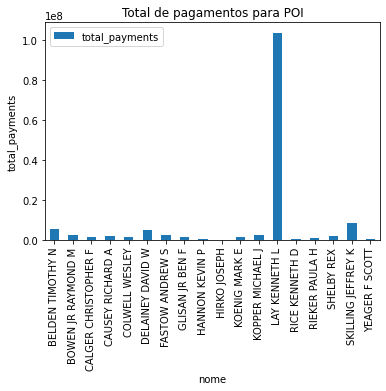

In [43]:
ptru.plot(x='name',y='total_payments', kind='bar')
plt.title('Total de pagamentos para POI')
plt.xlabel('nome')
plt.ylabel('total_payments')

plt.show()

## Verificando o salario entre os POI's encontramos novamente os dois que mais apresentam anomalias

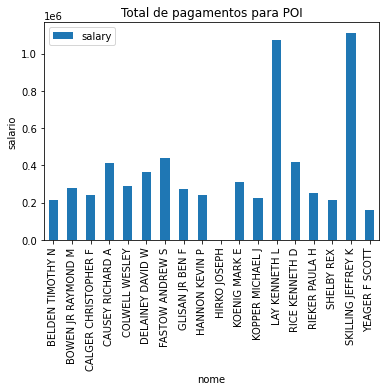

In [44]:
ptru.plot(x='name',y='salary', kind='bar')
plt.title('Total de pagamentos para POI')
plt.xlabel('nome')
plt.ylabel('salario')

plt.show()

## Visualizando com valores, para melhor Eficiência

### As pessoas POI relacionado com o total de pagamento

In [45]:
fig = px.scatter(ptru, x="name", y="total_payments",color="name")
fig.show()

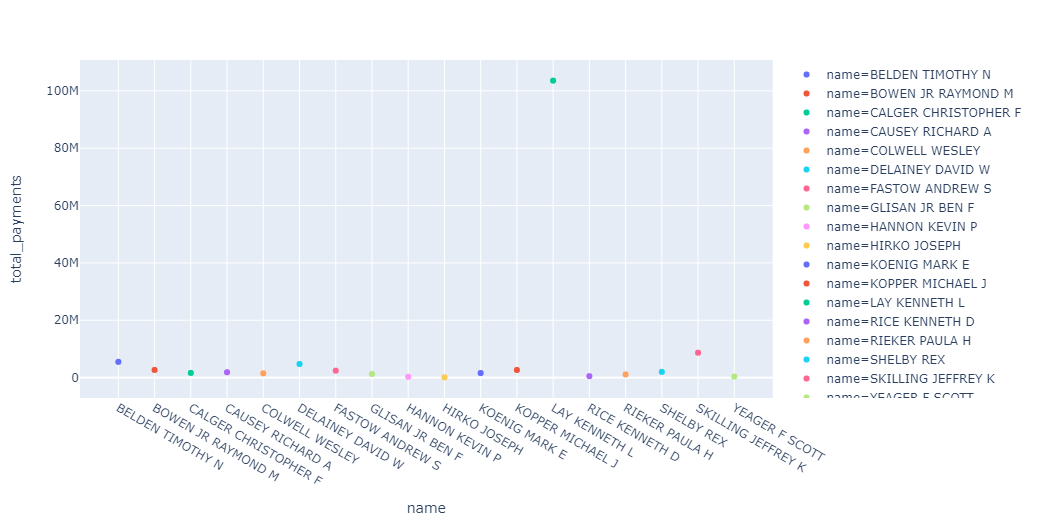

### As pessoas POI relacionado a variavel salario.

In [46]:
fig = px.scatter(ptru, x="name", y="salary",color="name")
fig.show()

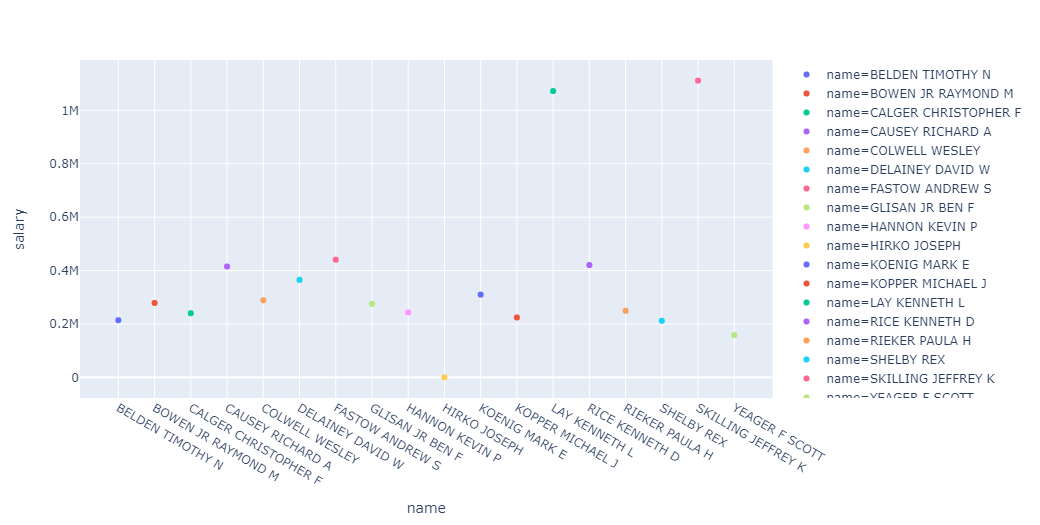

### Somamos Total de pagamentos

In [47]:
ptru['total_payments'].max()

103559793.0

# Conclusão
 Conseguimos ver que com poucas linhas de codigo ja conseguimos pegar algumas anomalias nos valores, com isso analisar mais profundamente cada individuo e classificar nitidamente quais possuem ligação com a fraude.
 
 Respondendo a pergunta quem "fraudou" mais , e a resposta conseguimos tirar apenas olhando para o grafico.
 
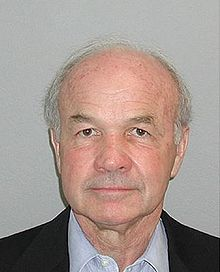 

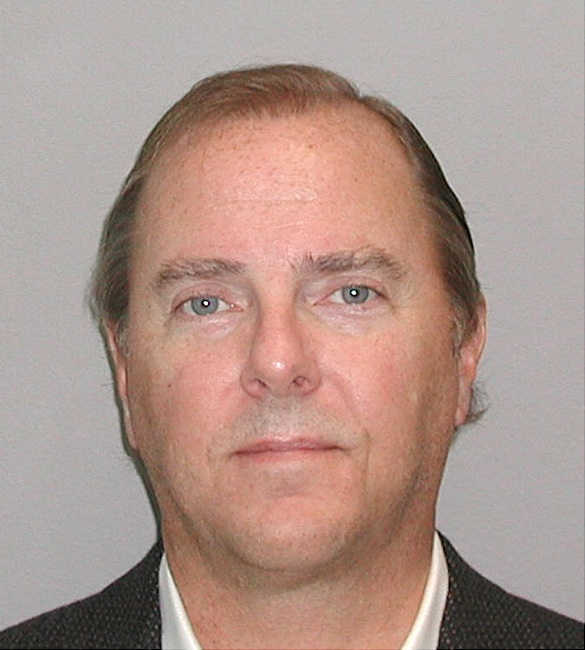
 

## Reflexão

Contudo visto visualizamos que fica facil com analise exploratoria de dados fica facil até para quem não entende muito do assunto verificar as anomalias apenas olhando os graficos interativos, colocar o Storytelling na hora de apresentar os resultados facilita muito o entendimento, outras maneiras de achar anomalias seria verificar os conteudos dos emails trocados entre POI.


# Referências

Data science na pratica,  Pesquisa no Google sobre a empresa Enron, até mesmo o filme Jick & Jane

## Trabalhos futuros
Com a mesma base de dados talvez seja muito pouco para criar algo de machine learn , porem existe a base total, com elas conseguimos treinar um modelo para verificar anomalias que apresentam pagamentos , salarios e gastos.
Tambem conseguimos fazer Text mining nos email a procura de palavras que são consideradas " fraudulentas".